In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd "gdrive/MyDrive/Colab Notebooks/VinBrain_Intern/W1/1. U-Net on SIIM dataset"

[Errno 2] No such file or directory: 'gdrive/MyDrive/Colab Notebooks/VinBrain_Intern/W1/1. U-Net on SIIM dataset'
/content/gdrive/My Drive/Colab Notebooks/VinBrain_Intern/W1/1. U-Net on SIIM dataset


In [ ]:
# import substantial library
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
# Read csv file
train_data_frame = pd.read_csv("./Dataset/train_info_split.csv")
val_data_frame = pd.read_csv("./Dataset/val_info_split.csv")

In [ ]:
train_data_frame.head()

,ImageId,EncodedPixels,storage_type,display_name,pat_age,pat_sex,modality,body_part_examined,view_position,rows,cols,pixel_spacing_x,pixel_spacing_y
0,1.2.276.0.7230010.3.1.2.8323329.13304.15178752...,258287 6 1015 10 1012 13 1009 16 1006 19 1004...,1.2.840.10008.5.1.4.1.1.7,"839f5774-945e-4721-a73a-5fc5aab1c8f4,",45,F,CR,CHEST,PA,1024.0,1024.0,0.143,0.143
1,1.2.276.0.7230010.3.1.2.8323329.32341.15178751...,581786 2 1021 2 1020 4 1019 4 1018 5 1017 6 1...,1.2.840.10008.5.1.4.1.1.7,"3dd0675e-0ae5-4a7b-a323-ea0aebc995f6,",19,F,CR,CHEST,PA,1024.0,1024.0,0.143,0.143
2,1.2.276.0.7230010.3.1.2.8323329.12939.15178752...,591027 5 1014 14 1008 16 1007 17 1005 19 1004...,1.2.840.10008.5.1.4.1.1.7,"8bbc2aab-f134-4e48-9f66-eb29e1f55561,",39,F,CR,CHEST,AP,1024.0,1024.0,0.171,0.171
3,1.2.276.0.7230010.3.1.2.8323329.10157.15178752...,618710 13 1006 28 992 37 983 46 975 54 968 61...,1.2.840.10008.5.1.4.1.1.7,"365e1a58-cdc4-4f3a-88c2-59e9f1368914,",81,M,CR,CHEST,PA,1024.0,1024.0,0.143,0.143
4,1.2.276.0.7230010.3.1.2.8323329.10631.15178752...,330232 1 1023 2 1022 3 1021 4 1019 6 1018 6 1...,1.2.840.10008.5.1.4.1.1.7,"116e39ae-fb9a-42c2-b9b0-ed13d4c59030,",24,M,CR,CHEST,AP,1024.0,1024.0,0.139,0.139


In [ ]:
val_data_frame.head()

,ImageId,EncodedPixels,storage_type,display_name,pat_age,pat_sex,modality,body_part_examined,view_position,rows,cols,pixel_spacing_x,pixel_spacing_y
0,1.2.276.0.7230010.3.1.2.8323329.4440.151787518...,532609 13 1005 19 1002 21 999 25 989 32 988 3...,1.2.840.10008.5.1.4.1.1.7,"fdccd800-6a1f-4111-824a-f2ddd879228d,",65,F,CR,CHEST,AP,1024.0,1024.0,0.139000,0.139000
1,1.2.276.0.7230010.3.1.2.8323329.2663.151787517...,611601 7 1013 13 1010 16 1006 19 1004 21 1002...,1.2.840.10008.5.1.4.1.1.7,"fbe6042c-0ac0-45a4-8e20-75c03b76efea,",42,F,CR,CHEST,AP,1024.0,1024.0,0.139000,0.139000
2,1.2.276.0.7230010.3.1.2.8323329.10960.15178752...,258168 2 1020 5 1018 7 1016 8 1016 8 1015 9 1...,1.2.840.10008.5.1.4.1.1.7,"13fcbc94-3570-4f43-bed4-1bb1670ff170,",26,M,CR,CHEST,PA,1024.0,1024.0,0.194311,0.194311
3,1.2.276.0.7230010.3.1.2.8323329.13054.15178752...,256181 1 1022 5 1019 5 1018 5 1018 6 1017 7 1...,1.2.840.10008.5.1.4.1.1.7,"146b53ed-f1c2-4c0e-b2ba-ae99a8973d51,",65,M,CR,CHEST,PA,1024.0,1024.0,0.143000,0.143000
4,1.2.276.0.7230010.3.1.2.8323329.1574.151787516...,230581 1 1020 3 1019 4 1019 3 1019 4 1019 4 1...,1.2.840.10008.5.1.4.1.1.7,"156cad8a-fe30-4986-96cd-473b52b386de,",48,M,CR,CHEST,PA,1024.0,1024.0,0.194311,0.194311


In [ ]:
train_data_frame.dtypes

ImageId                object
EncodedPixels          object
storage_type           object
display_name           object
pat_age                 int64
pat_sex                object
modality               object
body_part_examined     object
view_position          object
rows                  float64
cols                  float64
pixel_spacing_x       float64
pixel_spacing_y       float64
dtype: object

In [ ]:
val_data_frame.dtypes

ImageId                object
EncodedPixels          object
storage_type           object
display_name           object
pat_age                 int64
pat_sex                object
modality               object
body_part_examined     object
view_position          object
rows                  float64
cols                  float64
pixel_spacing_x       float64
pixel_spacing_y       float64
dtype: object

In [ ]:
# Count samples on train dataset
print("Shape of train dataset: ", train_data_frame.shape)
# Count samples on val dataset
print("Shape of val dataset: ", val_data_frame.shape)

Shape of train dataset:  (7457, 13)
Shape of val dataset:  (829, 13)


In [ ]:
# Take a glance a sample in train dataset
one_sample = train_data_frame[7:8]
one_sample

,ImageId,EncodedPixels,storage_type,display_name,pat_age,pat_sex,modality,body_part_examined,view_position,rows,cols,pixel_spacing_x,pixel_spacing_y
7,1.2.276.0.7230010.3.1.2.8323329.12119.15178752...,166349 9 1012 12 1009 14 1007 17 1003 21 998 ...,1.2.840.10008.5.1.4.1.1.7,"3b8dd918-ddb1-466c-bc8b-23549191ba50,",64,M,CR,CHEST,AP,1024.0,1024.0,0.139,0.139


In [ ]:
def extract_sample_detail(sample):
  return sample.iloc[0]

In [ ]:
print(extract_sample_detail(one_sample))

ImageId               1.2.276.0.7230010.3.1.2.8323329.12939.15178752...
EncodedPixels          591027 5 1014 14 1008 16 1007 17 1005 19 1004...
storage_type                                  1.2.840.10008.5.1.4.1.1.7
display_name                     8bbc2aab-f134-4e48-9f66-eb29e1f55561, 
pat_age                                                              39
pat_sex                                                               F
modality                                                             CR
body_part_examined                                                CHEST
view_position                                                        AP
rows                                                               1024
cols                                                               1024
pixel_spacing_x                                                   0.171
pixel_spacing_y                                                   0.171
Name: 2, dtype: object


In [ ]:
len(one_sample['EncodedPixels'].values[0].split(" "))

691

In [ ]:
# count patients vs non-patients on train dataset
patients_dframe = train_data_frame[train_data_frame['EncodedPixels'] != ' -1']
non_patients_dframe = train_data_frame[train_data_frame['EncodedPixels'] == ' -1']
print(len(patients_dframe))
print(len(non_patients_dframe))

2957
4500


<BarContainer object of 2 artists>

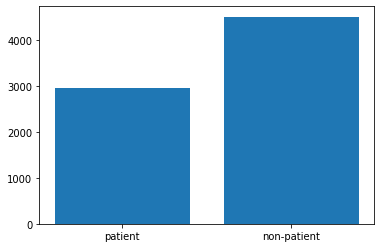

In [ ]:
plt.bar(['patient','non-patient'], [len(patients_dframe), len(non_patients_dframe)])

In [ ]:
# count patients vs non-patients on validation dataset
patients_val_dframe = val_data_frame[val_data_frame['EncodedPixels'] != ' -1']
non_patients_val_dframe = val_data_frame[val_data_frame['EncodedPixels'] == ' -1']
print(len(patients_val_dframe))
print(len(non_patients_val_dframe))

329
500


<BarContainer object of 2 artists>

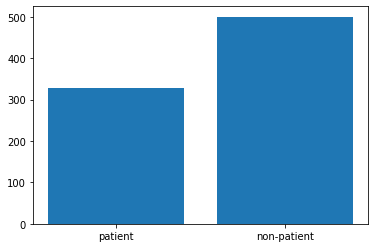

In [ ]:
plt.bar(['patient','non-patient'], [len(patients_val_dframe), len(non_patients_val_dframe)])

In [ ]:
!pip install pydicom

     |████████████████████████████████| 1.9MB 7.4MB/s 


[[ 23  18  12 ...  56  65  43]
 [ 22  17  12 ...  41  47  27]
 [ 21  16  11 ...  28  32  14]
 ...
 [ 42  40  37 ... 227 250 168]
 [ 52  49  46 ... 228 250 168]
 [ 61  58  56 ... 229 251 167]]


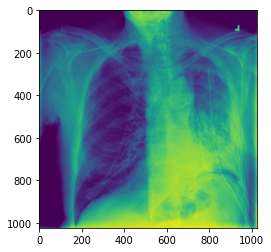

In [ ]:
# Read file dcm
import pydicom as dicom
image_path = '1.2.276.0.7230010.3.1.4.8323329.5797.1517875190.762694.dcm'
ds = dicom.dcmread(image_path)
pixel_array_numpy = ds.pixel_array
print(pixel_array_numpy)
plt.imshow(pixel_array_numpy)

**Let**'**s** **go**